In [59]:
import pandas as pd
import numpy as np
import re
import math
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

import os
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\skripsi\df_classified_updated.csv')
df

,Unnamed: 0,date,link,username,tweet,like,retweet,reply,qrt,cleansing,normalization,stemmed,tokenized,filtered,preprocessed,label,sentimen
0,0,2021-06-29 18:03:57,https://twitter.com/doxbby/status/140993568626...,doxbby,@kebpvin LAH ITU NORMAL MSIB,0,0,1,0,LAH ITU NORMAL MSIB,LAH ITU NORMAL MSIB,lah itu normal msib,"['lah', 'itu', 'normal', 'msib']","['normal', 'msib']",normal msib,0,Netral
1,1,2021-06-26 04:47:10,https://twitter.com/collegemenfess/status/1408...,collegemenfess,[cm] hallo guys! di program MSIB kalian apply ...,13,0,0,2,cm hallo guys di program MSIB kalian apply p...,cuma halo guys di program MSIB kalian apply ...,cuma halo guys di program msib kalian apply pa...,"['cuma', 'halo', 'guys', 'di', 'program', 'msi...","['halo', 'guys', 'program', 'msib', 'apply', '...",halo guys program msib apply pakai creative cv...,0,Netral
2,2,2021-06-24 07:27:38,https://twitter.com/soilUB_official/status/140...,soilUB_official,"RT fpub_official ""Kementrian Pendidikan dan Ke...",0,0,0,0,RT fpub official Kementrian Pendidikan dan Ke...,RT fpub official Kementrian Pendidikan dan Ke...,rt fpub official tri didik dan budaya ri ada s...,"['rt', 'fpub', 'official', 'tri', 'didik', 'da...","['rt', 'fpub', 'official', 'tri', 'didik', 'bu...",rt fpub official tri didik budaya ri sosialisa...,0,Netral
3,3,2021-06-24 07:21:26,https://twitter.com/fpub_official/status/14079...,fpub_official,Kementrian Pendidikan dan Kebudayaan RI \nmeng...,2,0,1,0,Kementrian Pendidikan dan Kebudayaan RI mengad...,Kementrian Pendidikan dan Kebudayaan RI mengad...,tri didik dan budaya ri ada sosialisasi progra...,"['tri', 'didik', 'dan', 'budaya', 'ri', 'ada',...","['tri', 'didik', 'budaya', 'ri', 'sosialisasi'...",tri didik budaya ri sosialisasi program magang...,0,Netral
4,4,2021-06-23 07:28:30,https://twitter.com/RatnoWistu/status/14076014...,RatnoWistu,https://t.co/dKvge0jeNs : Ingin Punya Pengalam...,0,0,0,0,Ingin Punya Pengalaman di Dunia Profesi Ikuti...,Ingin Punya Pengalaman di Dunia Profesi Ikuti...,ingin punya alam di dunia profesi ikut program...,"['ingin', 'punya', 'alam', 'di', 'dunia', 'pro...","['alam', 'dunia', 'profesi', 'program', 'msib'...",alam dunia profesi program msib kampus merdeka,0,Netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10549,10564,2023-02-01 00:39:53,https://twitter.com/undipmenfess/status/162058...,undipmenfess,"-dips! Tolong bangunin aku jam 12 siang nanti,...",0,0,0,0,dips Tolong bangunin aku jam siang nanti ...,dips Tolong bangunin aku jam siang nanti ...,dips tolong bangunin aku jam siang nanti soal ...,"['dips', 'tolong', 'bangunin', 'aku', 'jam', '...","['bangunin', 'jam', 'siang', 'bineka', 'msib',...",bangunin jam siang bineka msib wajah stres,-1,Negatif
10550,10565,2023-02-01 00:37:53,https://twitter.com/aciiw22/status/16205821723...,aciiw22,Ada yg udah dapat email offering msib dari PT ...,2,0,7,0,Ada yg udah dapat email offering msib dari PT ...,Ada yang sudah dapat email offering msib dari ...,ada yang sudah dapat email offering msib dari ...,"['ada', 'yang', 'sudah', 'dapat', 'email', 'of...","['email', 'offering', 'msib', 'pt', 'inka']",email offering msib pt inka,0,Netral
10551,10566,2023-02-01 00:30:00,https://twitter.com/ubsansfess/status/16205801...,ubsansfess,Tips interview MSIB dong braw!,66,4,7,1,Tips interview MSIB dong braw,Tips interview MSIB dong braw,tips interview msib dong braw,"['tips', 'interview', 'msib', 'dong', 'braw']","['tips', 'interview', 'msib']",tips interview msib,0,Netral
10552,10567,2023-02-01 00:22:28,https://twitter.com/gabrielamelinaw/status/162...,gabrielamelinaw,"@JayaIrisan Gabisa, mesti ajuin banding ke pih...",0,0,1,0,Gabisa mesti ajuin banding ke pihak MSIB,enggak bisa mesti ajuin banding ke pihak MSIB,enggak bisa mesti ajuin banding ke pihak msib,"['enggak', 'bisa', 'mesti', 'ajuin', 'banding'...","['mesti', 'ajuin', 'banding', 'msib']",mesti ajuin banding msib,0,Netral


# Analisis Teks

In [3]:
# Jumlah tweets setiap sentimen

df['sentimen'].value_counts()

Netral     7957
Negatif    1381
Positif    1216
Name: sentimen, dtype: int64

Text(0.5, 1.0, 'Tweets berdasarkan Sentimen')

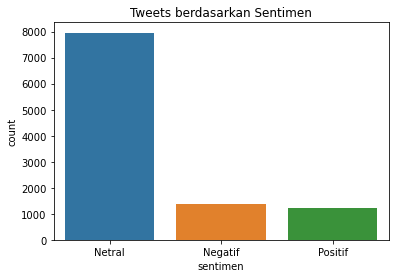

In [6]:
# Grafik jumlah tweets berdasarkan sentimen

sns.countplot(data= df, x= 'sentimen',
             order = df['sentimen'].value_counts().index).set_title('Tweets berdasarkan Sentimen')

In [7]:
df['jumlah_karakter'] = df.tweet.apply(len)
df['jumlah_kata'] = df.tweet.apply(lambda sent: len(sent.split()))

Text(0.5, 1.0, 'Jumlah Kata dalam Tweets')

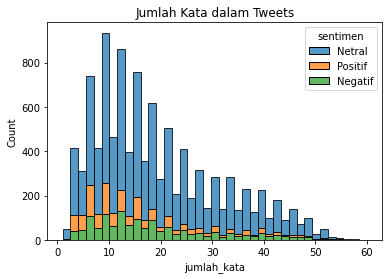

In [8]:
# Distribusi Jumlah Kata dalam Tweets
sns.histplot(data = df, x= 'jumlah_kata', hue= 'sentimen', multiple= 'stack').set_title("Jumlah Kata dalam Tweets")

Text(0.5, 1.0, 'Jumlah Karakter dalam Tweets')

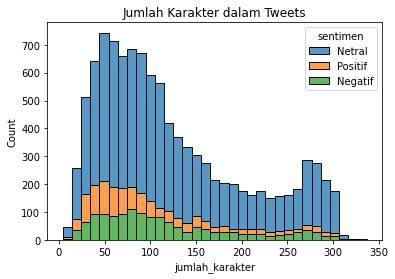

In [9]:
# Distribusi Jumlah Karakter dalam Tweets
sns.histplot(data= df, x= 'jumlah_karakter', hue= 'sentimen', multiple= 'stack').set_title("Jumlah Karakter dalam Tweets")

In [10]:
words = [word for sent in df['preprocessed'] for word in sent.split()]

In [37]:
# 10 Kata dengan Jumlah Penggunaan Terbanyak
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
freq_words_df = pd.DataFrame(freq_words_sorted[:30], columns=['word', 'counts'])
freq_words_df.head(10)

,word,counts
0,msib,11009
1,wajah,2545
2,magang,2359
3,daftar,1716
4,program,1482
5,kalo,1372
6,terima,1321
7,menang,1293
8,kampus,1288
9,keras,1191


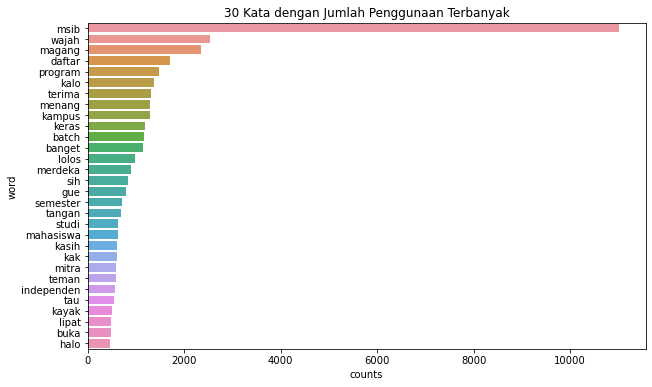

In [38]:
# 30 Kata dengan Jumlah Penggunaan Terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(data= freq_words_df , x= 'counts', y= 'word')
plt.title('30 Kata dengan Jumlah Penggunaan Terbanyak')
plt.show();

In [39]:
def freq_sentiment_words(df, sentimen, num):
    words = [word for sent in df[df['sentimen'] == sentimen]['preprocessed'] for word in sent.split()]
    freq_words = Counter(words)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:num], columns=['word', 'counts'])
    return freq_words_df

In [43]:
kata_positif = freq_sentiment_words(df, 'Positif', 30)
kata_negatif = freq_sentiment_words(df, 'Negatif', 30)
kata_netral = freq_sentiment_words(df, 'Netral', 30)

In [42]:
def plot_freq(var, st):
    plt.figure(figsize=(12, 6))
    sns.barplot(data= var , x= 'counts', y= 'word')
    plt.title(f'30 Kata dengan Penggunaan Terbanyak pada Sentimen {st}')
    plt.show();

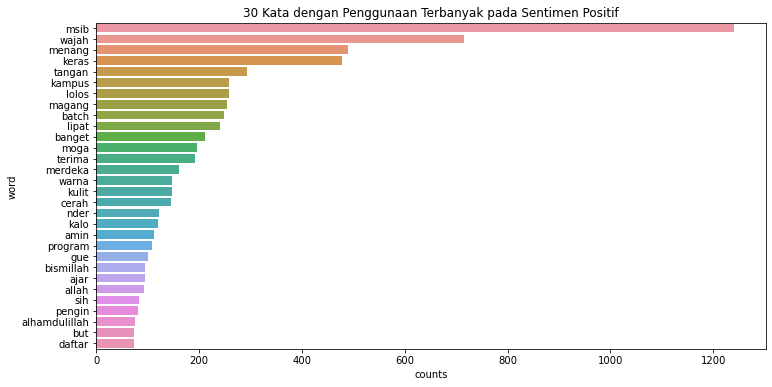

In [44]:
plot_freq(kata_positif, 'Positif')

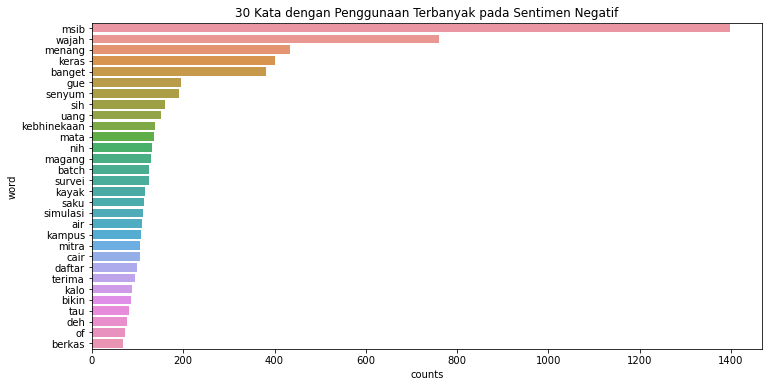

In [45]:
plot_freq(kata_negatif, 'Negatif')

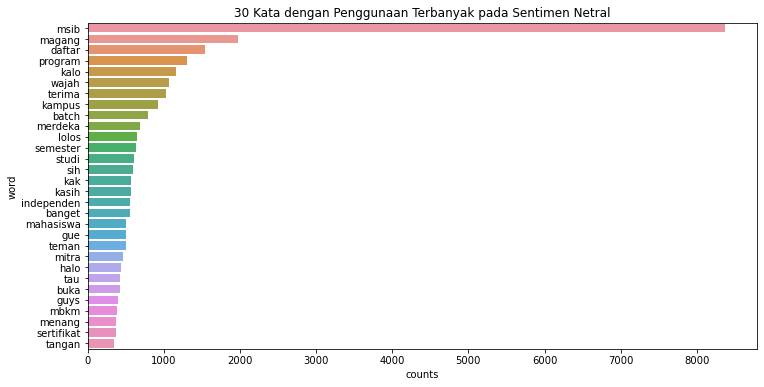

In [46]:
plot_freq(kata_netral, 'Netral')

In [24]:
def top_n_gram(df, sentimen,  n_gram, top_n=None):
    
    text = [word for sent in df[df['sentimen'] == sentimen]['preprocessed'] for word in sent.split()]

    grams = ngrams(text, n_gram)
    grams = (' '.join(g) for g in grams)
    num_of_grams = [words for words in grams]
    freq_words = Counter(num_of_grams)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:top_n], columns=['word', 'counts'])
    return freq_words_df[:top_n]

In [49]:
positive_gram = top_n_gram(df, 'Positif', 2, 30)
positive_gram.head()

,word,counts
0,wajah menang,480
1,menang keras,478
2,lipat tangan,241
3,keras wajah,220
4,msib batch,189


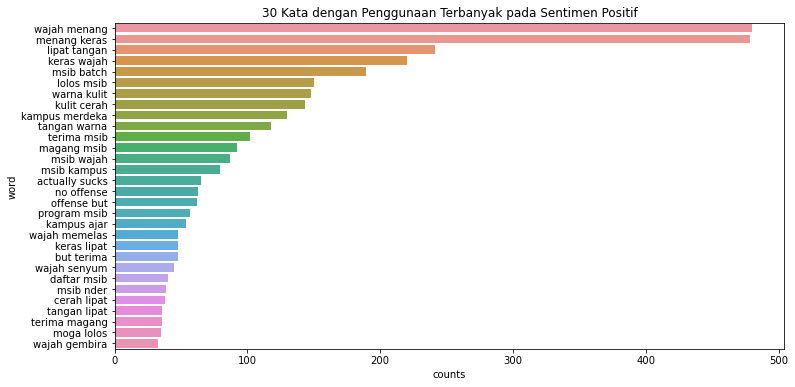

In [50]:
plot_freq(positive_gram, 'Positif')

In [31]:
negative_gram = top_n_gram(df, 'Negatif', 2, 30)
negative_gram.head()

,word,counts
0,wajah menang,405
1,menang keras,398
2,wajah senyum,188
3,keras wajah,161
4,air mata,108


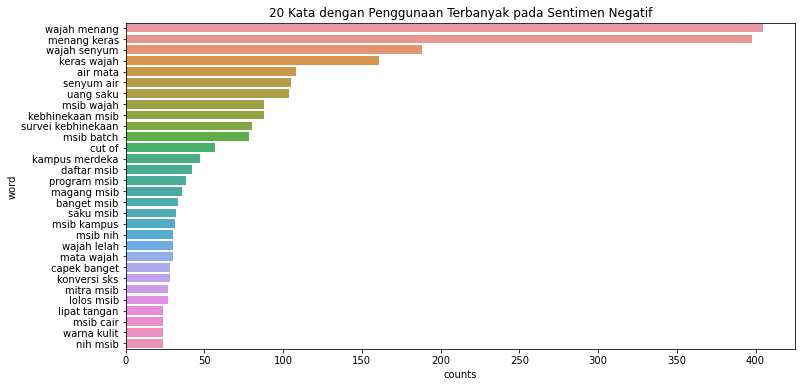

In [32]:
plot_freq(negative_gram, 'Negatif')

In [33]:
neutral_gram = top_n_gram(df, 'Netral', 2, 30)
neutral_gram.head()

,word,counts
0,daftar msib,702
1,msib batch,598
2,program msib,566
3,studi independen,559
4,kampus merdeka,544


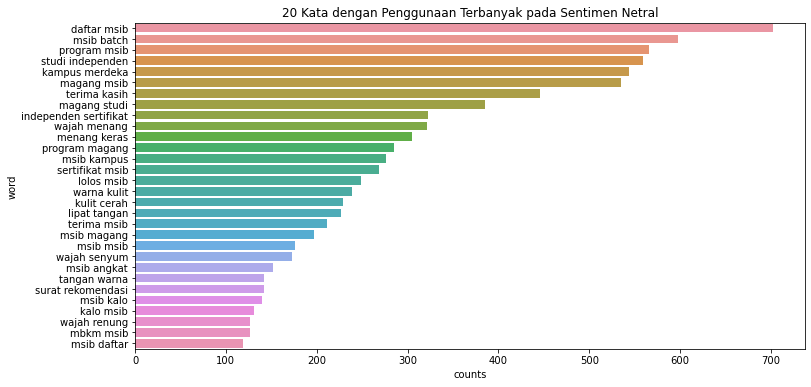

In [35]:
plot_freq(neutral_gram, 'Netral')

In [51]:
# getting list of positive words 
positive_text_clean = df[df['sentimen' ] == 'Positif']['preprocessed']
positive_clean_words = [word for words in positive_text_clean for word in words.split()]
positive_clean_words[:10]

['loyo',
 'banget',
 'msib',
 'amin',
 'moga',
 'lulus',
 'msib',
 'wajah',
 'menang',
 'keras']

In [52]:
# getting list of negative words 
negative_text_clean = df[df['sentimen' ] == 'Negatif']['preprocessed']
negative_clean_words = [word for words in negative_text_clean for word in words.split()]
negative_clean_words[:10]

['ngelepas',
 'kkn',
 'smt',
 'tawar',
 'msib',
 'murid',
 'guru',
 'bikin',
 'mrinding',
 'jobnya']

In [53]:
# getting list of neutral words 
neutral_text_clean = df[df['sentimen' ] == 'Netral']['preprocessed']
neutral_clean_words = [word for words in neutral_text_clean for word in words.split()]
neutral_clean_words[:10]

['normal',
 'msib',
 'halo',
 'guys',
 'program',
 'msib',
 'apply',
 'pakai',
 'creative',
 'cv']

ValueError: Only supported for TrueType fonts

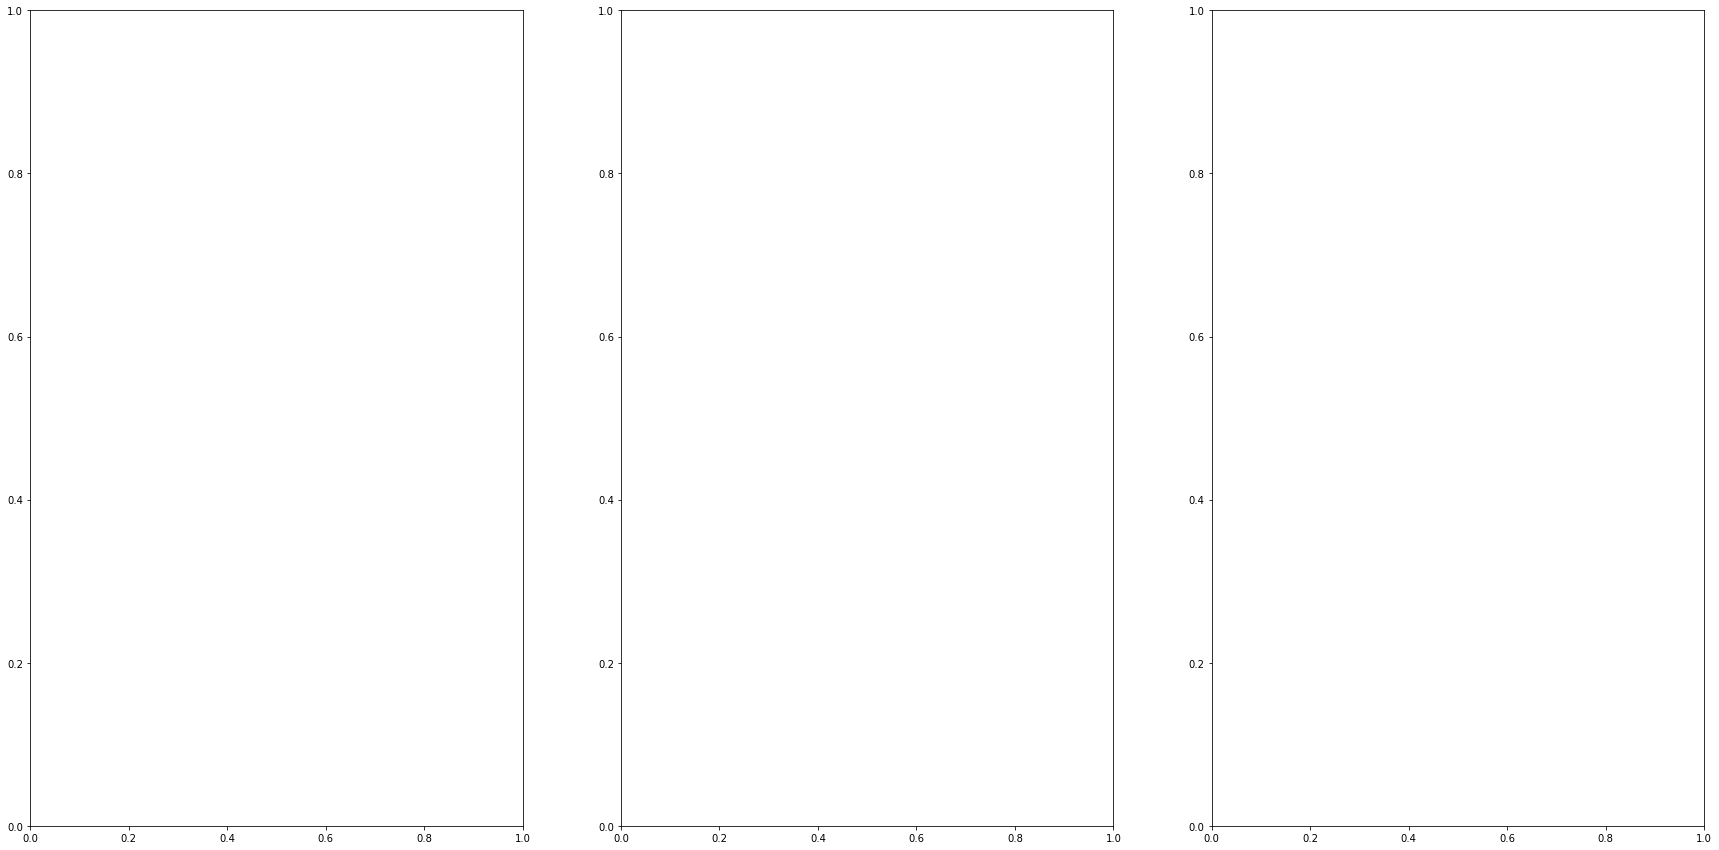

In [64]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive_clean_words))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative_clean_words))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neutral_clean_words))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=40);

# Engagement Analytics